# SD212: Graph mining
## Lab 4: Graph clustering

In this lab, you will learn to cluster a graph and interpret the results. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, BiLouvain, modularity
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [5]:
graph = grid(9, 9, True)
adjacency = graph.adjacency
position = graph.position

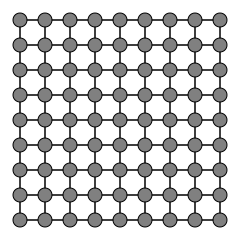

In [6]:
image = svg_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and display it with the labels.
* What is the modularity?
* Try the ``shuffle_nodes`` option and observe the results.
* Find a better clustering than Louvain in terms of modularity. **Hint:** Guess and calculate!

In [7]:
louvain = Louvain()

In [8]:
labels = louvain.fit_transform(adjacency)

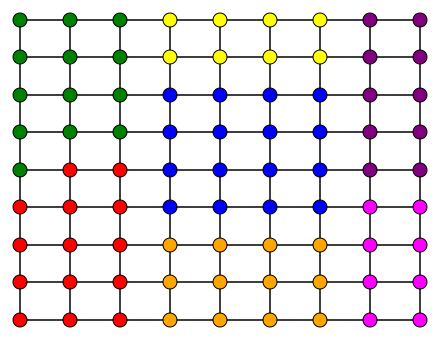

In [9]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [10]:
modularity(adjacency, labels)

0.6220341435185185

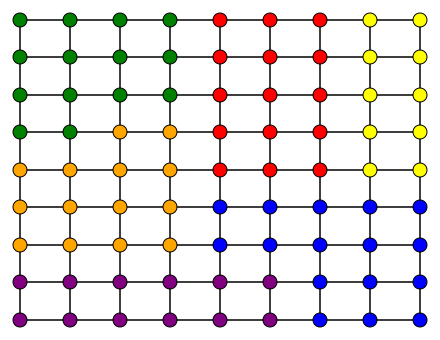

In [11]:
louvain = Louvain(shuffle_nodes = True)
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [12]:
modularity(adjacency, labels)

0.6192611882716048

In [13]:
labels

array([4, 4, 3, 3, 3, 2, 2, 2, 2, 4, 4, 3, 3, 3, 2, 2, 2, 2, 4, 4, 3, 3,
       3, 3, 2, 2, 2, 4, 4, 3, 3, 3, 3, 2, 2, 2, 4, 4, 0, 0, 1, 1, 1, 1,
       1, 4, 4, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 5, 5], dtype=int64)

In [14]:
labels = np.array(list(np.arange(9, dtype=int)) * 9)
modularity(adjacency, labels)

0.38736979166666663

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [15]:
graph = karate_club(metadata=True)

In [16]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

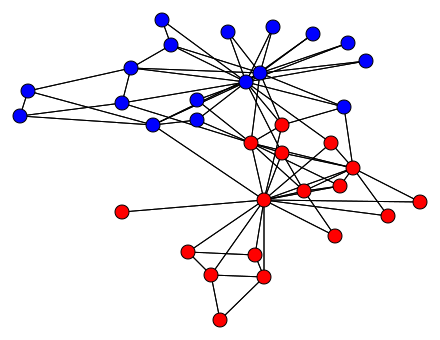

In [17]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* What is the modularity?
* Display the aggregate graph.
* Adapt the resolution to get 2 clusters. How many nodes are misclassified?

In [18]:
louvain = Louvain()

In [19]:
labels = louvain.fit_transform(adjacency)

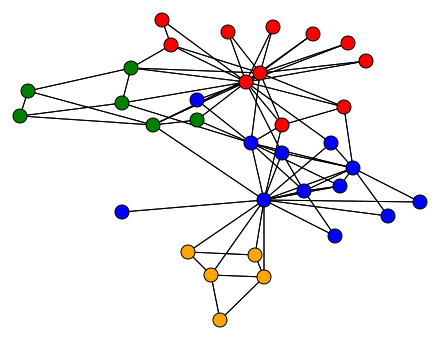

In [20]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [21]:
modularity(adjacency, labels)

0.4188034188034188

In [22]:
adjacency_aggregate = louvain.adjacency_

In [23]:
average_aggregate = normalize(membership_matrix(labels).T)
position_aggregate = average_aggregate.dot(position)

In [24]:
labels_unique, counts = np.unique(labels, return_counts=True)

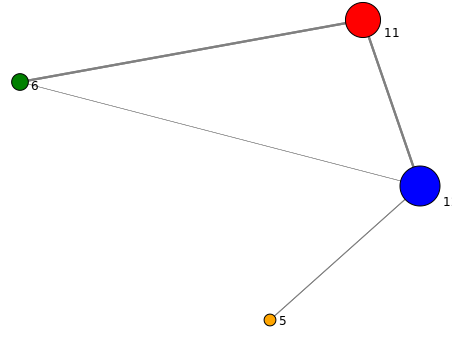

In [25]:
image = svg_graph(adjacency_aggregate, position_aggregate, names=counts, labels=labels_unique, display_node_weight=True)
SVG(image)

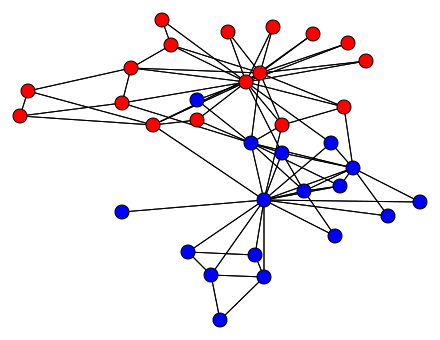

In [26]:
louvain = Louvain(resolution = 0.5)
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [27]:
min(sum(labels == labels_true), sum(labels != labels_true))

2

## Openflights


In [28]:
graph = openflights

In [29]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

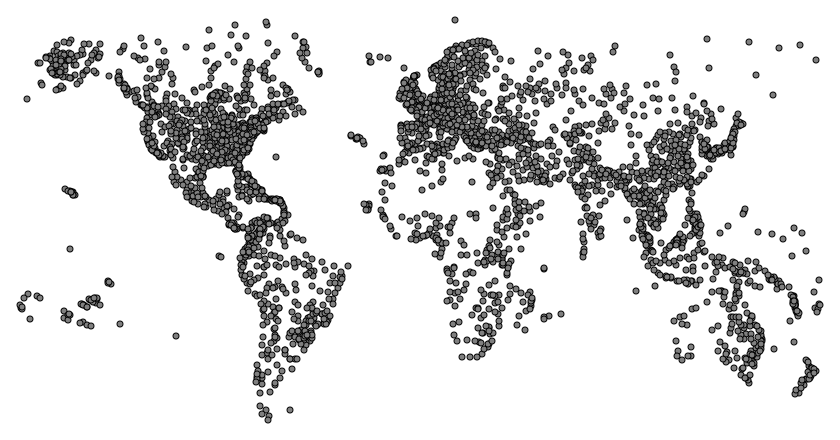

In [30]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? Check the parameters of the function ``modularity``.
* How do you interpret the *inverse* of the Simpson index?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* What is the strongest cluster among those having more than 100 nodes? **Hint:** Use the aggregate graph.

In [31]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [32]:
labels_unique = np.unique(labels, return_counts=False)
print("There are %i clusters" % len(labels_unique))

There are 35 clusters


In [33]:
adjacency_aggregate = louvain.adjacency_
volumes = adjacency_aggregate.dot(np.ones(adjacency_aggregate.shape[1]))
v = sum(volumes)
simpson = sum([(vol/v)**2 for vol in volumes])
print(simpson)

0.2154905534111209


In [34]:
degrees = adjacency.dot(np.ones(np.shape(adjacency)[1]))
top_airports = []
for l in labels_unique : 
    ind = np.where(labels == l)[0]
    deg = degrees[ind]
    i = np.argmax(deg)
    top_airports.append(names[ind[i]])

In [35]:
top_airports

['Hartsfield Jackson Atlanta International Airport',
 'Beijing Capital International Airport',
 'Amsterdam Airport Schiphol',
 'Atatürk International Airport',
 'Guarulhos - Governador André Franco Montoro International Airport',
 'Sydney Kingsford Smith International Airport',
 'Domodedovo International Airport',
 'Ted Stevens Anchorage International Airport',
 'Quebec Jean Lesage International Airport',
 'Bethel Airport',
 'Trondheim Airport Værnes',
 'Sioux Lookout Airport',
 'Kuujjuarapik Airport',
 'Fairbanks International Airport',
 "Faa'a International Airport",
 'Rankin Inlet Airport',
 'Yellowknife Airport',
 'Godthaab / Nuuk Airport',
 'Stockholm-Bromma Airport',
 'Nairobi Wilson Airport',
 'João Paulo II Airport',
 'Touat Cheikh Sidi Mohamed Belkebir Airport',
 'Kirkwall Airport',
 'Sitia Airport',
 'Myeik Airport',
 'Eilat Airport',
 'Vilhelmina Airport',
 'Golfito Airport',
 'Pori Airport',
 'Ivalo Airport',
 "St. Mary's Airport",
 'Jyvaskyla Airport',
 'Lycksele Airport',

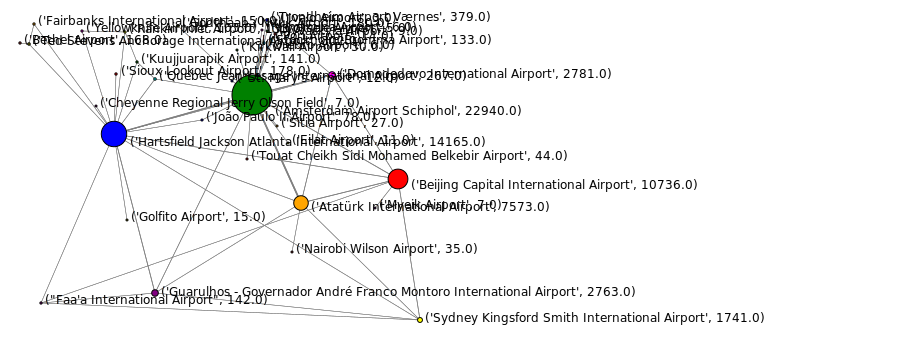

In [36]:
average_aggregate = normalize(membership_matrix(labels).T)
position_aggregate = average_aggregate.dot(position)
agg_names = [(top_airports[i], volumes[i]) for i in range(len(volumes))]
image = svg_graph(adjacency_aggregate, position_aggregate, names=agg_names, labels=labels_unique, display_node_weight=True)
SVG(image)

In [37]:
strength = []
for i in range(len(labels_unique)) : 
    strength.append(adjacency_aggregate.toarray()[i][i]/volumes[i])
print(strength)

[0.9032121426050124, 0.9116989567809239, 0.8796861377506539, 0.7798758748184339, 0.8635541078537822, 0.8811028144744399, 0.7141316073354909, 0.9271523178807947, 0.8239700374531835, 0.9761904761904762, 0.7704485488126649, 0.9438202247191011, 0.8368794326241135, 0.9733333333333334, 0.9436619718309859, 0.9022556390977443, 0.8932038834951457, 0.9888888888888889, 0.6766917293233082, 0.9142857142857143, 0.717948717948718, 0.7272727272727273, 0.8, 0.6666666666666666, 0.8571428571428571, 0.9090909090909091, 0.6666666666666666, 0.8, 0.7142857142857143, 0.6666666666666666, 0.8333333333333334, 0.6666666666666666, 0.8, 0.6666666666666666, 0.8571428571428571]


## 2. Directed graphs

## Wikipedia Vitals

In [38]:
graph = wikivitals

In [39]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank (with restart in the cluster).
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* What is the strongest cluster? the weakest cluster?
* Do the same experiments at resolution 2.

In [40]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)

In [41]:
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)

## 3. Bipartite graphs

## Cinema

In [42]:
graph = cinema

In [43]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Cluster the graph by Louvain (resolution 1). Use ``BiLouvain``.
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of each cluster in terms of Personalized BiPageRank.